**Tips for plotting results**

- There is no fundamental rule to determine how a plot should look like, but there are some simple tricks that can easily improve the presentation of figures

- Here I collect some of the styles I use, in case this serves for inspiration

- Most if not all of what is presented here was learned in stackoverflow. Internet is a great resource of information



In [1]:
#-- DEFINITIONS --
import numpy as np
import mpmath as mp

import math
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


from matplotlib.ticker import ScalarFormatter
#To activate 
%config InlineBackend.figure_format = 'retina'

#To use LaTex font
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#It is usually good to make the label in the plots larger. An easy way is to define different font size
fontSz = 15
fontsz = 13
fontssz = 11

#This are the default python colors in case you like them
default_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

#It is typically useful to set your output directory
import sys
dir_base=sys.path[0]
dir_out=dir_base+"/your_figure_folder/"

*Example 1: a single plot with a color bar*

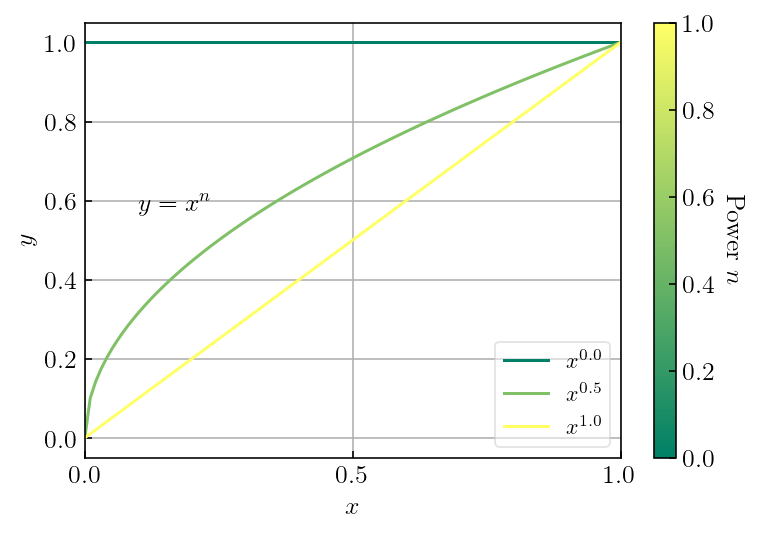

In [2]:
fig = plt.figure()

xs = np.linspace(0,1,100)
ns = np.linspace(0,1,3)

# we create a norm for the color bar
norm = mpl.colors.Normalize(vmin=np.min(ns),vmax=np.max(ns))
# choose a colormap
c_m = mpl.cm.summer
c_m2 = mpl.cm.summer
# create a ScalarMappable and initialize a data structure
s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

#Lets plot come curves
for i in range(len(ns)):
    plt.plot(xs,xs**ns[i],color=s_m.to_rgba(ns[i]),label=r'$x^{%s}$' % (ns[i]))

cbar = plt.colorbar(s_m)
cbar.set_label(r'Power $n$', rotation=270,labelpad=15,fontsize=fontsz)
cbar.ax.tick_params(direction='in',labelsize=fontsz)

plt.xlim([0,1])#set xaxis limits
plt.xticks([0,0.5,1])#set xticks
plt.xlabel(r'$x$ ',fontsize=fontsz)
plt.ylabel(r'$y$',fontsize=fontsz)
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)

plt.legend(fontsize=fontssz,framealpha=0.5)

#x_pos = -39
#In case you need to add text
plt.text(.1, 0.62, r'$y=x^n$', fontsize=fontsz,verticalalignment='top')
plt.grid()

#When saving the figure you can elimininate unnecessary white space around the figure with 'tight'
#You can make the background transparent

#plt.savefig(dir_out+'my_plot.pdf', bbox_inches='tight', transparent=True)
plt.show()

*Example 2: multiple panels*

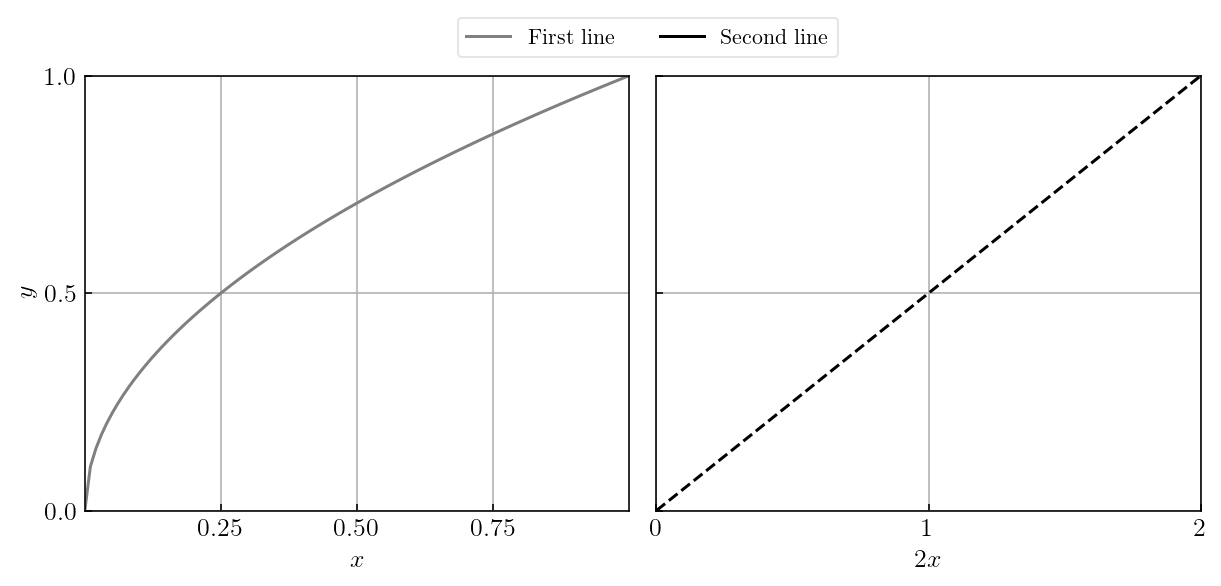

In [3]:
xs = np.linspace(0,1,100)
ns = np.linspace(0,1,3)

#FIGURES
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), gridspec_kw={'wspace': .05}, sharey=True)
#one can similarly make colum plots and share x axis

#sometimes is useful to define limits
ymin,ymax = 0,1

ax1.plot(xs,xs**ns[1],color='gray',label=r'First line')
ax1.plot([],color='black',label=r'Second line')

ax1.set_xlim([0,1])
ax1.set_xticks([0.25,0.5,0.75])
ax1.set_yticks([0,0.5,1])
ax1.set_ylim([ymin,ymax])
ax1.set_xlabel(r'$x$',fontsize=fontsz)
ax1.set_ylabel(r'$y$',fontsize=fontsz)
ax1.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
ax1.grid()
fig.legend(ncol=2,loc='lower center',bbox_to_anchor=(0.45,.9),fontsize=fontssz,framealpha=0.5)


ax2.plot(2*xs,xs**ns[2],'--',color='black')

ax2.set_xlim([0,2])
ax2.set_xticks([0,1,2])
ax2.set_ylim([ymin,ymax])
ax2.set_xlabel(r'$2x$',fontsize=fontsz)
ax2.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
ax2.grid()


#plt.savefig(dir_out+my_great_multiple_panel_plot'.pdf', bbox_inches='tight', transparent=True)
plt.show()